# Факторный анализ в Python

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as ss
from math import  sin, cos, pi 
from statsmodels.formula.api import ols
from scipy.stats import chi2
from numpy import arange

In [2]:
features = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]#, "X10"]
f_len = len (features)
unclr_data = pd.read_excel ('ЛР 4.xlsx')
unclr_data = unclr_data[features]

unclr_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0.550909,-0.456354,-0.625030,-0.354471,1.077778,1.051521,0.610943,-0.294640,-0.816480
1,0.864949,0.767179,0.199023,0.241207,2.142743,1.169850,0.516397,0.143576,0.086356
2,-0.262225,0.506562,0.289679,-0.606353,-0.355807,0.443996,0.043666,0.123418,1.236121
3,0.188435,1.431635,-0.530478,0.028876,-0.695752,-0.045192,-0.271488,-0.136165,-0.392070
4,-1.154079,-0.780811,0.010769,0.642145,-0.368769,-0.845349,0.327305,-0.150557,0.320792


## Удаляем строки с пустыми значениями и стандартизируем данные

In [3]:
unsc_data = unclr_data[unclr_data!='-'].dropna().astype('float64')
index = unsc_data.index 
columns = unsc_data.columns 
scaled = (unsc_data - unsc_data.mean(axis=0))/unsc_data.std()
data = pd.DataFrame(scaled, columns=columns, index=index) 

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0.550909,-0.456354,-0.625030,-0.354471,1.077778,1.051521,0.610943,-0.294640,-0.816480
1,0.864949,0.767179,0.199023,0.241207,2.142743,1.169850,0.516397,0.143576,0.086356
2,-0.262225,0.506562,0.289679,-0.606353,-0.355807,0.443996,0.043666,0.123418,1.236121
3,0.188435,1.431635,-0.530478,0.028876,-0.695752,-0.045192,-0.271488,-0.136165,-0.392070
4,-1.154079,-0.780811,0.010769,0.642145,-0.368769,-0.845349,0.327305,-0.150557,0.320792


## Корреляционная матрица

In [4]:
correlations = data.corr()

correlations

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,0.337020,0.255880,0.296896,0.577569,0.486704,0.219689,0.030272,0.273646
X2,0.337020,1.000000,0.502469,0.527726,0.221108,0.072294,-0.161744,0.112938,0.306288
X3,0.255880,0.502469,1.000000,0.391519,0.138415,-0.028247,-0.332628,0.486666,0.682649
X4,0.296896,0.527726,0.391519,1.000000,0.124912,-0.008186,0.212826,0.042594,0.253661
X5,0.577569,0.221108,0.138415,0.124912,1.000000,0.767666,0.019947,0.249774,0.408598
X6,0.486704,0.072294,-0.028247,-0.008186,0.767666,1.000000,0.067901,0.205931,0.297715
X7,0.219689,-0.161744,-0.332628,0.212826,0.019947,0.067901,1.000000,-0.307145,-0.324024
X8,0.030272,0.112938,0.486666,0.042594,0.249774,0.205931,-0.307145,1.000000,0.769659
X9,0.273646,0.306288,0.682649,0.253661,0.408598,0.297715,-0.324024,0.769659,1.000000


## Проверим гипотезу о незначимости корреляционной матрицы с использованием критерия Уилкса

In [5]:
def chi_2(n,k,R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R), math.e)

chi_2_crt=chi_2(data.shape[0],data.shape[1],correlations)
print('Наблюдаемое значение составило',chi_2_crt)
p_value=chi2.sf(chi_2_crt, data.shape[1]*(data.shape[1]-1)/2)
print ('Значение p-value равно {}'.format(p_value))
if p_value>0.05:
    print('Принимаем гипотезу, матрица парных коэффициентов корреляции незначима')
else:
    print('Отвергаем гипотезу, матрица парных коэффициентов корреляции значима')

Наблюдаемое значение составило 365.2112099674974
Значение p-value равно 4.287835352668172e-56
Отвергаем гипотезу, матрица парных коэффициентов корреляции значима


## Оценка общности признаков
### Общность- доля дисперсии признака, объясняемая общими факторами
### Для i-ого признака: квадрат оценки множественного коеффициента детерминации уравнения регрессии i-ого признака на все остальные 

In [6]:
communalities=[]
for variable in features:
    communalities.append(ols(formula="{} ~ {}".format(variable, ' + '.join(set(features)-set([variable]))), 
                             data=data).fit().rsquared)

pd.DataFrame(communalities,index = features,columns = ['Communalities'])

,Communalities
X1,0.512129
X2,0.457671
X3,0.649986
X4,0.454183
X5,0.673492
X6,0.636544
X7,0.385489
X8,0.644742
X9,0.777035


## Расчет редуцированной матрицы
### Редуцированная матрица=корреляционная матрица с оценками общностей признака на диагонали

In [7]:
Rh_eval = np.empty((f_len,f_len)) 
for i in range(f_len):
    for j in range(f_len):
        if i==j:
            Rh_eval[i][j] = communalities[i]
        else:
            Rh_eval[i][j] = correlations.values [i][j]
pd.DataFrame(Rh_eval, index=features, columns=features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,0.512129,0.337020,0.255880,0.296896,0.577569,0.486704,0.219689,0.030272,0.273646
X2,0.337020,0.457671,0.502469,0.527726,0.221108,0.072294,-0.161744,0.112938,0.306288
X3,0.255880,0.502469,0.649986,0.391519,0.138415,-0.028247,-0.332628,0.486666,0.682649
X4,0.296896,0.527726,0.391519,0.454183,0.124912,-0.008186,0.212826,0.042594,0.253661
X5,0.577569,0.221108,0.138415,0.124912,0.673492,0.767666,0.019947,0.249774,0.408598
X6,0.486704,0.072294,-0.028247,-0.008186,0.767666,0.636544,0.067901,0.205931,0.297715
X7,0.219689,-0.161744,-0.332628,0.212826,0.019947,0.067901,0.385489,-0.307145,-0.324024
X8,0.030272,0.112938,0.486666,0.042594,0.249774,0.205931,-0.307145,0.644742,0.769659
X9,0.273646,0.306288,0.682649,0.253661,0.408598,0.297715,-0.324024,0.769659,0.777035


## Расчет собственных чисел и соответствующих им собственных векторов редуцированной матрицы

### Собственные значения- дисперсия выделенных факторов

In [8]:
uns_eigenvalues_Rh_eval, eigenveсtors_Rh_eval=np.linalg.eig(Rh_eval)
couple_lst=[]

for i in range(len(uns_eigenvalues_Rh_eval)):
    couple_lst.append((uns_eigenvalues_Rh_eval[i], eigenveсtors_Rh_eval[:,i]))

from operator import itemgetter

couple_lst = sorted(couple_lst, key = itemgetter(0),reverse=True)
eigenvalues_Rh_eval=sorted(uns_eigenvalues_Rh_eval,reverse=True)

couple_lst

[(2.926666680500021,
  array([ 0.30774031,  0.2991429 ,  0.40041855,  0.22819696,  0.37062043,
          0.28581836, -0.12110132,  0.3571673 ,  0.49205173])),
 (1.5188189846366635,
  array([ 0.38818754, -0.07442507, -0.3577606 , -0.00369665,  0.44783666,
          0.49342331,  0.37074227, -0.2847322 , -0.23069143])),
 (1.066464295943221,
  array([ 0.21765465,  0.44947449,  0.20450808,  0.5782146 , -0.18125148,
         -0.29809175,  0.27138062, -0.37568342, -0.1948004 ])),
 (0.2849844508065183,
  array([ 0.01136534,  0.41396399,  0.08870202, -0.28171367,  0.17970463,
          0.10406188, -0.67981329, -0.40350721, -0.27053133])),
 (0.033405076329979716,
  array([ 0.61210141, -0.35022324,  0.44846964, -0.42090718, -0.14498794,
         -0.21870685,  0.05962385, -0.21729659,  0.06899758])),
 (-0.10790115599895239,
  array([ 0.22857469,  0.25756532,  0.08368788, -0.1851446 , -0.14047428,
          0.04246336,  0.09487604,  0.63456498, -0.63790375])),
 (-0.13516101901966432,
  array([ 0.07

## Сравнение суммарной общности с суммой собственных чисел редуцированной матрицы для поиска количества факторов, до которого можно снизить размерность признакового пространства. 

In [9]:
#np.trace- сумма диагональных элементов матрицы
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первого собственного числа редуцированной матрицы:', eigenvalues_Rh_eval[0])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]:
    print('Размерность признакового пространства можно снизить до одного общего фактора.')
else:
    print('До одного фактора снизить нельзя')

Суммарная общность:  5.191270720274751
Сумма оценок первого собственного числа редуцированной матрицы: 2.926666680500021
До одного фактора снизить нельзя


In [10]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых двух собственных чисел редуцированной матрицы:', eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]:
    print('Размерность признакового пространства можно снизить до двух общих факторов.')
else:
    print('До двух факторов снизить нельзя')

Суммарная общность:  5.191270720274751
Сумма оценок первых двух собственных чисел редуцированной матрицы: 4.445485665136685
До двух факторов снизить нельзя


In [11]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых трех собственных чисел редуцированной матрицы:', 
      eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2]:
    print('Размерность признакового пространства можно снизить до трех общих факторов.')
else:
    print('До трех факторов снизить нельзя')

Суммарная общность:  5.191270720274751
Сумма оценок первых трех собственных чисел редуцированной матрицы: 5.511949961079906
Размерность признакового пространства можно снизить до трех общих факторов.


## Критерий каменистой осыпи

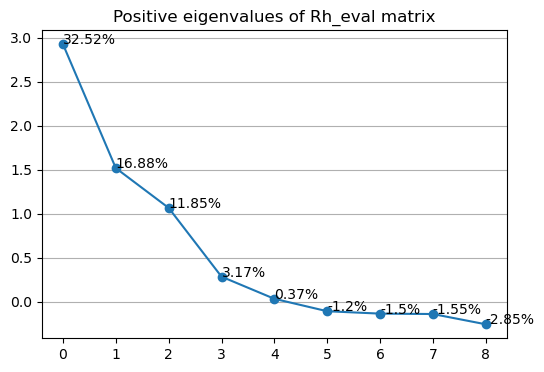

In [12]:
dft = pd.DataFrame([])
eigenvalues_pos=[]
for i in range (len(eigenvalues_Rh_eval)):
    if eigenvalues_Rh_eval[i] >= -5:
        eigenvalues_pos.append(eigenvalues_Rh_eval[i])
dft['y'] = eigenvalues_pos
dft['x'] = list (range(len(eigenvalues_pos)))
dft['Tot_var'] = (dft['y']/f_len).apply(lambda x: round(x *100, 2)).apply(str) +'%'

plt.figure(figsize=(6,4))
plt.plot(dft['x'], dft['y'], marker='o')
ax = plt.gca()
dft.apply(lambda x: ax.annotate(x['Tot_var'], (x['x'], x['y'])), axis=1)
plt.title('Positive eigenvalues of Rh_eval matrix')
plt.grid(axis='y')
plt.show()

## Критерий Кайзера

In [13]:
print('Критерий Кайзера предлагает {} фактор(-а/ов).'
      .format(len(uns_eigenvalues_Rh_eval[uns_eigenvalues_Rh_eval >1])))

Критерий Кайзера предлагает 3 фактор(-а/ов).


## Берем три фактора

In [14]:
fact = 3

U = np.empty ((fact,f_len)) 
for i in range(fact):
    U[i]=couple_lst[i][1]

df_U=pd.DataFrame(data=U, index=['Factor_'+str(i +1) for i in range(fact)], columns=features)

df_U

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Factor_1,0.307740,0.299143,0.400419,0.228197,0.370620,0.285818,-0.121101,0.357167,0.492052
Factor_2,0.388188,-0.074425,-0.357761,-0.003697,0.447837,0.493423,0.370742,-0.284732,-0.230691
Factor_3,0.217655,0.449474,0.204508,0.578215,-0.181251,-0.298092,0.271381,-0.375683,-0.194800


In [15]:
sqrt_l=np.eye(fact)
for i in range(fact):
    sqrt_l[i][i]=math.sqrt(eigenvalues_Rh_eval[i])  
A=np.dot(U.T,sqrt_l)
df_A = pd.DataFrame(data=A, columns=['Factor_'+str(i + 1) for i in range(fact)], index=features)

df_A

,Factor_1,Factor_2,Factor_3
X1,0.526467,0.478404,0.224771
X2,0.511759,-0.091722,0.464171
X3,0.685016,-0.440906,0.211195
X4,0.390388,-0.004556,0.597121
X5,0.634039,0.551916,-0.187178
X6,0.488964,0.608097,-0.307839
X7,-0.207174,0.456904,0.280254
X8,0.611024,-0.350905,-0.387967
X9,0.841778,-0.284305,-0.201170


In [16]:
df_A['Factor_1'] *= -1# если не совпал первый столбец
df_A['Factor_2'] *= -1# если не совпал второй столбец
# df_A['Factor_3'] *= -1# если не совпал третий столбец
df_A

,Factor_1,Factor_2,Factor_3
X1,-0.526467,-0.478404,0.224771
X2,-0.511759,0.091722,0.464171
X3,-0.685016,0.440906,0.211195
X4,-0.390388,0.004556,0.597121
X5,-0.634039,-0.551916,-0.187178
X6,-0.488964,-0.608097,-0.307839
X7,0.207174,-0.456904,0.280254
X8,-0.611024,0.350905,-0.387967
X9,-0.841778,0.284305,-0.201170


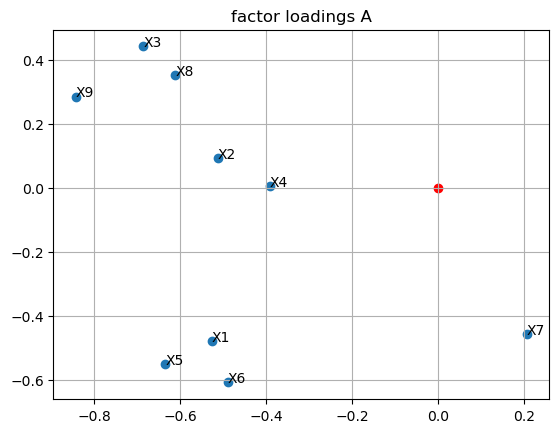

In [17]:
plt.scatter(df_A['Factor_1'], df_A['Factor_2'])
plt.scatter (0, 0, c = 'r')
plt.grid()
plt.title ('factor loadings A')
for variable in features :
    plt.annotate('{}'.format(variable), xy = (df_A['Factor_1'][variable],df_A['Factor_2'][variable]))

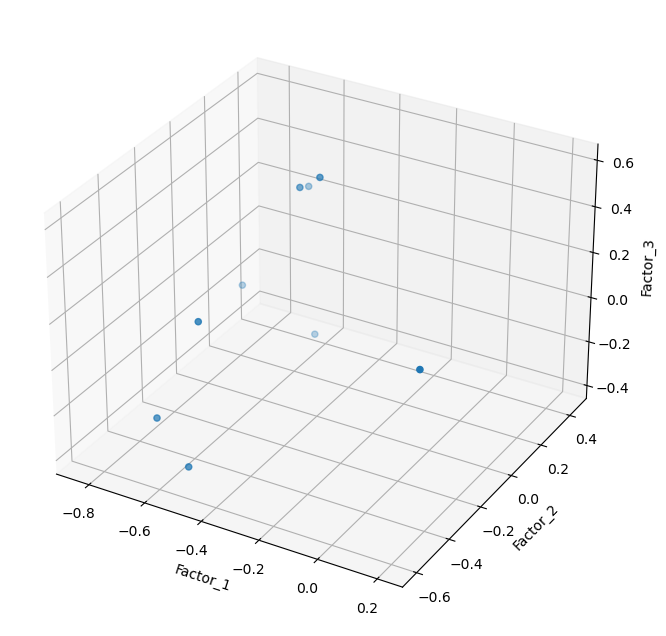

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_A['Factor_1'], df_A['Factor_2'], df_A['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Factor_3')

plt.show()

## Функции квартимакс и варимакс для расчета критериев q и v при вращении факторных осей

In [19]:
def quartimax (X): 
    value = 0
    m = X.shape[1]
    for row in X:
        value += (sum (row**4) - (sum(row**2))**2)/m**2
    return value

def varimax (X) :
    value = 0
    k = X.shape[0]
    for row in X.T:
        value += (k*sum(row**4) -sum(row**2)**2)/k**2
    return value

def criteria (method,X):
    if method == 'varimax':
        return varimax(X)
    elif method == 'quartimax':
        return quartimax (X)
    else:
        print ('wrong input')

## Вращение в случае двух факторов

In [20]:
rad_column = []
grad_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.0001):

    rad_column.append(alpha)
    grad_column.append(alpha*180/pi)

    grad = alpha
    T = [[cos(grad),sin(grad)],
         [-sin(grad),cos(grad)]]
    B = np.dot (A,T)
    dict_for_B[criteria('quartimax',B)] = B
    criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['rad'] = rad_column
df_rotation['grad'] = grad_column
df_rotation ['criteria'] = criteria_column
df_rotation

ValueError: shapes (9,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

## Для трех факторов (выполняется около 10 минут), используем квартимакс в качестве критерия

In [37]:
import tqdm
radx_column = []
gradx_column=[]
rady_column = []
grady_column=[]
radz_column = []
gradz_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.01):
    print(alpha)
    for alpha2 in arange(0, pi/2, 0.01):
        for alpha3 in arange(0, pi/2, 0.01):
            radx_column.append(alpha)
            gradx_column.append(alpha*180/pi)
            rady_column.append(alpha2)
            grady_column.append(alpha2*180/pi)
            radz_column.append(alpha3)
            gradz_column.append(alpha3*180/pi)            
            
            grad = alpha
            grad2 = alpha2
            grad3 = alpha3
            T = [[1, 0, 0],
                 [0, cos(grad), -sin(grad)],
                 [0, sin(grad), cos(grad)]]
            T2 = [[cos(grad2), 0, sin(grad2)],
                 [0, 1, 0],
                 [-sin(grad2), 0, cos(grad2)]]
            T3 = [[cos(grad3), -sin(grad3), 0],
                 [sin(grad3), cos(grad3), 0],
                 [0, 0, 1]]
            B = np.dot(np.dot(np.dot (A,T), T2), T3)
            dict_for_B[criteria('quartimax',B)] = B
            criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['radx'] = radx_column
df_rotation['gradx'] = gradx_column
df_rotation['rady'] = rady_column
df_rotation['grady'] = grady_column
df_rotation['radz'] = radz_column
df_rotation['gradz'] = gradz_column
df_rotation ['criteria'] = criteria_column
df_rotation

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.

,radx,gradx,rady,grady,radz,gradz,criteria
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,-0.190353
1,0.00,0.000000,0.00,0.000000,0.01,0.572958,-0.189099
2,0.00,0.000000,0.00,0.000000,0.02,1.145916,-0.187792
3,0.00,0.000000,0.00,0.000000,0.03,1.718873,-0.186434
4,0.00,0.000000,0.00,0.000000,0.04,2.291831,-0.185026
...,...,...,...,...,...,...,...
3944307,1.57,89.954374,1.57,89.954374,1.53,87.662543,-0.189540
3944308,1.57,89.954374,1.57,89.954374,1.54,88.235500,-0.189760
3944309,1.57,89.954374,1.57,89.954374,1.55,88.808458,-0.189980
3944310,1.57,89.954374,1.57,89.954374,1.56,89.381416,-0.190198


In [38]:
criteria_best = df_rotation ['criteria'].max()

criteria_best

-0.08332597989964272

## Вывод лучшего угла вращения для трех факторов

In [23]:
radx_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radx']
gradx_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradx']
rady_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rady']
grady_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grady']
radz_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radz']
gradz_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradz']

print ('Лучший угол для вращения x:{:.3f} y:{:.3f} z:{:.3f} радиан или x:{:.3f} y:{:.3f} z:{:.3f} градусов'
       .format (radx_best, gradx_best, rady_best, grady_best, radz_best, gradz_best))

Лучший угол для вращения x:1.300 y:74.485 z:0.570 радиан или x:32.659 y:0.470 z:26.929 градусов


## Вывод лучшего угла вращения для двух факторов

In [33]:
rad_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rad']
grad_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grad']

print ('Лучший угол для вращения :{:.3f} радиан или {:.3f} градусов'.format (rad_best,grad_best))

KeyError: 'rad'

## Матрица факторного отображения после вращения

In [39]:
B = dict_for_B [criteria_best]
df_B = pd.DataFrame(data=B, columns=['Factor_'+str(i +1) for i in range(fact)], index=features)

df_B

,Factor_1,Factor_2,Factor_3
X1,-0.046276,0.409963,-0.621569
X2,-0.294947,0.623955,-0.097220
X3,-0.707012,0.455100,0.035578
X4,-0.111970,0.700845,-0.072494
X5,-0.210786,0.070373,-0.832027
X6,-0.106165,-0.096318,-0.826489
X7,0.508904,0.181463,-0.195737
X8,-0.783199,-0.126738,-0.132440
X9,-0.859988,0.134130,-0.268921


In [40]:
df_B['Factor_1'] *= -1# если не совпал первый столбец
# df_B['Factor_2'] *= -1# если не совпал второй столбец
df_B['Factor_3'] *= -1# если не совпал третий столбец
df_B

,Factor_1,Factor_2,Factor_3
X1,0.046276,0.409963,0.621569
X2,0.294947,0.623955,0.097220
X3,0.707012,0.455100,-0.035578
X4,0.111970,0.700845,0.072494
X5,0.210786,0.070373,0.832027
X6,0.106165,-0.096318,0.826489
X7,-0.508904,0.181463,0.195737
X8,0.783199,-0.126738,0.132440
X9,0.859988,0.134130,0.268921


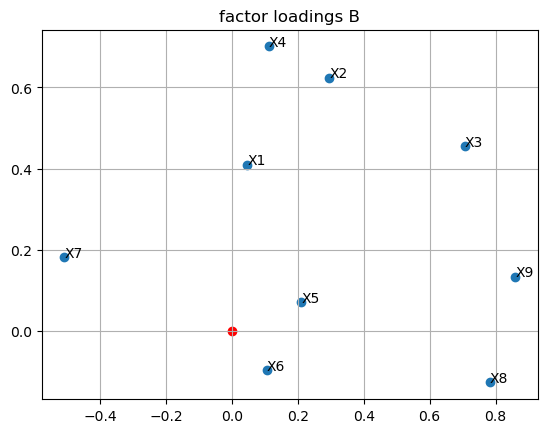

In [41]:
plt.scatter(df_B['Factor_1'],df_B['Factor_2'])
plt.scatter (0,0,c= 'r')
plt.grid()
plt.title ('factor loadings B')
for variable in features :
    plt.annotate('{}'.format(variable),xy = (df_B['Factor_1'][variable],df_B['Factor_2'][variable]))

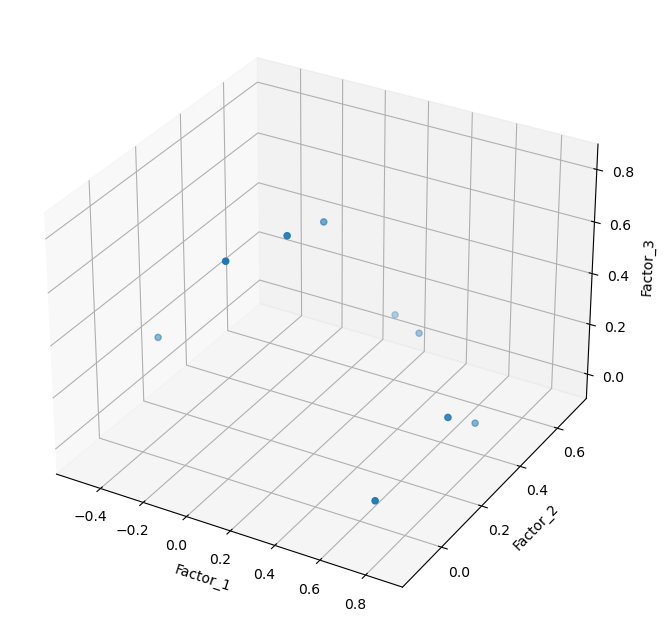

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_B['Factor_1'], df_B['Factor_2'], df_B['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Factor_3')

plt.show()

## Оценка редуцированной матрицы парных коэффициентов корреляции

In [43]:
Rh_real = np.dot(B,B.T)

pd.DataFrame(Rh_real,index = features,columns = features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,0.556560,0.329876,0.197178,0.337563,0.555767,0.479146,0.172507,0.066606,0.261938
X2,0.329876,0.485765,0.489034,0.477369,0.186970,0.051566,-0.017845,0.164799,0.363487
X3,0.197178,0.489034,0.708248,0.395540,0.151453,0.001821,-0.284181,0.491341,0.659497
X4,0.337563,0.477369,0.395540,0.508977,0.133239,0.004298,0.084386,0.008472,0.209792
X5,0.555767,0.186970,0.151453,0.133239,0.741652,0.703261,0.068359,0.266362,0.414462
X6,0.479146,0.051566,0.001821,0.004298,0.703261,0.703632,0.090268,0.204816,0.300642
X7,0.172507,-0.017845,-0.284181,0.084386,0.068359,0.090268,0.330225,-0.395648,-0.360673
X8,0.066606,0.164799,0.491341,0.008472,0.266362,0.204816,-0.395648,0.647003,0.692158
X9,0.261938,0.363487,0.659497,0.209792,0.414462,0.300642,-0.360673,0.692158,0.829888


## Оценка остаточной матрицы парных коэффициентов корреляции

In [44]:
D2 = correlations.values - Rh_real

pd.DataFrame(D2,index = features,columns = features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,0.443440,0.007144,0.058702,-0.040667,0.021802,0.007559,0.047182,-0.036334,0.011708
X2,0.007144,0.514235,0.013434,0.050357,0.034138,0.020728,-0.143899,-0.051861,-0.057199
X3,0.058702,0.013434,0.291752,-0.004021,-0.013038,-0.030068,-0.048447,-0.004674,0.023152
X4,-0.040667,0.050357,-0.004021,0.491023,-0.008327,-0.012485,0.128440,0.034122,0.043869
X5,0.021802,0.034138,-0.013038,-0.008327,0.258348,0.064405,-0.048412,-0.016588,-0.005864
X6,0.007559,0.020728,-0.030068,-0.012485,0.064405,0.296368,-0.022367,0.001115,-0.002926
X7,0.047182,-0.143899,-0.048447,0.128440,-0.048412,-0.022367,0.669775,0.088503,0.036649
X8,-0.036334,-0.051861,-0.004674,0.034122,-0.016588,0.001115,0.088503,0.352997,0.077501
X9,0.011708,-0.057199,0.023152,0.043869,-0.005864,-0.002926,0.036649,0.077501,0.170112


## Оценки характерностей

In [45]:
charact =[]
for i in range(D2.shape[0]):
    charact.append (math.sqrt(D2[i][i]))
    
charact

[0.6659131327628154,
 0.7171018873117395,
 0.5401405857524135,
 0.7007304464191033,
 0.508279582820881,
 0.5443970005862603,
 0.818397884815071,
 0.5941351390141747,
 0.4124460219123361]

## Связь исходных признаков с главными факторами

In [46]:
for i in range(0,f_len):
    print('{} = {:.3f}*F{} + {:.3f}*F{} + {:.3f}*F{} + {:.3f}*D{}'.format(features[i], B[i,0], 1, B[i,2], 2, B[i,1], 3, charact[i], i+1))

X1 = 0.046*F1 + -0.622*F2 + 0.410*F3 + 0.666*D1
X2 = 0.295*F1 + -0.097*F2 + 0.624*F3 + 0.717*D2
X3 = 0.707*F1 + 0.036*F2 + 0.455*F3 + 0.540*D3
X4 = 0.112*F1 + -0.072*F2 + 0.701*F3 + 0.701*D4
X5 = 0.211*F1 + -0.832*F2 + 0.070*F3 + 0.508*D5
X6 = 0.106*F1 + -0.826*F2 + -0.096*F3 + 0.544*D6
X7 = -0.509*F1 + -0.196*F2 + 0.181*F3 + 0.818*D7
X8 = 0.783*F1 + -0.132*F2 + -0.127*F3 + 0.594*D8
X9 = 0.860*F1 + -0.269*F2 + 0.134*F3 + 0.412*D9


## Индивидуальные значения главных факторов, полученные методом Бартлетта

In [33]:
scr_charact = np.eye(f_len)
for i in range(f_len):
    scr_charact[i][i] = D2[i][i]

Q = np.linalg.inv(np.dot(np.dot(B.T, np.linalg.inv(scr_charact)), B))
W = np.dot(np.dot(B.T,np.linalg.inv(scr_charact)),data.values.T)
F = np.dot(Q, W)
# df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect'] )
df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect', 'Factor3_lect'] ) 
#ДЛЯ 3х

df_factor_scores_lect

,Factor1_lect,Factor2_lect,Factor3_lect
0,-0.980904,-0.415442,-1.363203
1,-0.243321,0.484279,-1.875893
2,0.931627,-0.357364,0.050029
3,-0.389559,0.536696,0.314452
4,0.266195,-0.089801,0.819470
...,...,...,...
78,0.048465,-1.856742,2.145584
79,-0.743456,0.231065,0.224355
80,2.518287,3.274667,-2.281139
81,5.932557,-0.530973,0.741221


## Индивидуальные значения главных факторов, полученные методом, который используется в программе Statistica

In [47]:
factor_score_coefficients = np.dot(np.linalg.inv(correlations),B)
factor_scores = np.dot (data.values,factor_score_coefficients)
# df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , columns = ['Factor1_stat','Factor2_stat'])
df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , 
                                      columns = ['Factor1_stat','Factor2_stat', 'Factor3_stat'])
#для 3х

df_factor_scores_stat

,Factor1_stat,Factor2_stat,Factor3_stat
0,-0.824533,-0.322679,-1.068478
1,-0.075663,0.374054,-1.532406
2,0.848591,-0.171713,-0.000413
3,-0.240657,0.334116,0.301290
4,0.140115,-0.024145,0.636523
...,...,...,...
78,-0.097174,-1.426230,1.847488
79,-0.616563,0.116477,0.211045
80,2.464821,2.465007,-2.039933
81,4.922318,-0.096630,0.393453


## Собираем результат

In [35]:
df_result = pd.concat([df_factor_scores_lect, df_factor_scores_stat], axis=1)

df_result

,Factor1_lect,Factor2_lect,Factor3_lect,Factor1_stat,Factor2_stat,Factor3_stat
0,-0.980904,-0.415442,-1.363203,-0.824533,-0.322679,-1.068478
1,-0.243321,0.484279,-1.875893,-0.075663,0.374054,-1.532406
2,0.931627,-0.357364,0.050029,0.848591,-0.171713,-0.000413
3,-0.389559,0.536696,0.314452,-0.240657,0.334116,0.301290
4,0.266195,-0.089801,0.819470,0.140115,-0.024145,0.636523
...,...,...,...,...,...,...
78,0.048465,-1.856742,2.145584,-0.097174,-1.426230,1.847488
79,-0.743456,0.231065,0.224355,-0.616563,0.116477,0.211045
80,2.518287,3.274667,-2.281139,2.464821,2.465007,-2.039933
81,5.932557,-0.530973,0.741221,4.922318,-0.096630,0.393453


# Кластеризация

In [49]:
# Загружаем метки классов, полученные на 1 лабе для метода Уорда и К-средних

classes = pd.read_excel('Уорда+k средних.xlsx')
F = pd.DataFrame(factor_scores)
F.columns = ['Factor_' + str(i + 1) for i in range(factor_scores.shape[1])]
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old
0,-0.824533,-0.322679,-1.068478,3,6
1,-0.075663,0.374054,-1.532406,3,6
2,0.848591,-0.171713,-0.000413,4,1
3,-0.240657,0.334116,0.301290,4,1
4,0.140115,-0.024145,0.636523,2,1
...,...,...,...,...,...
78,-0.097174,-1.426230,1.847488,5,2
79,-0.616563,0.116477,0.211045,4,1
80,2.464821,2.465007,-2.039933,6,5
81,4.922318,-0.096630,0.393453,6,3


In [50]:
# Кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

Text(0.5, 1.0, 'ward method')

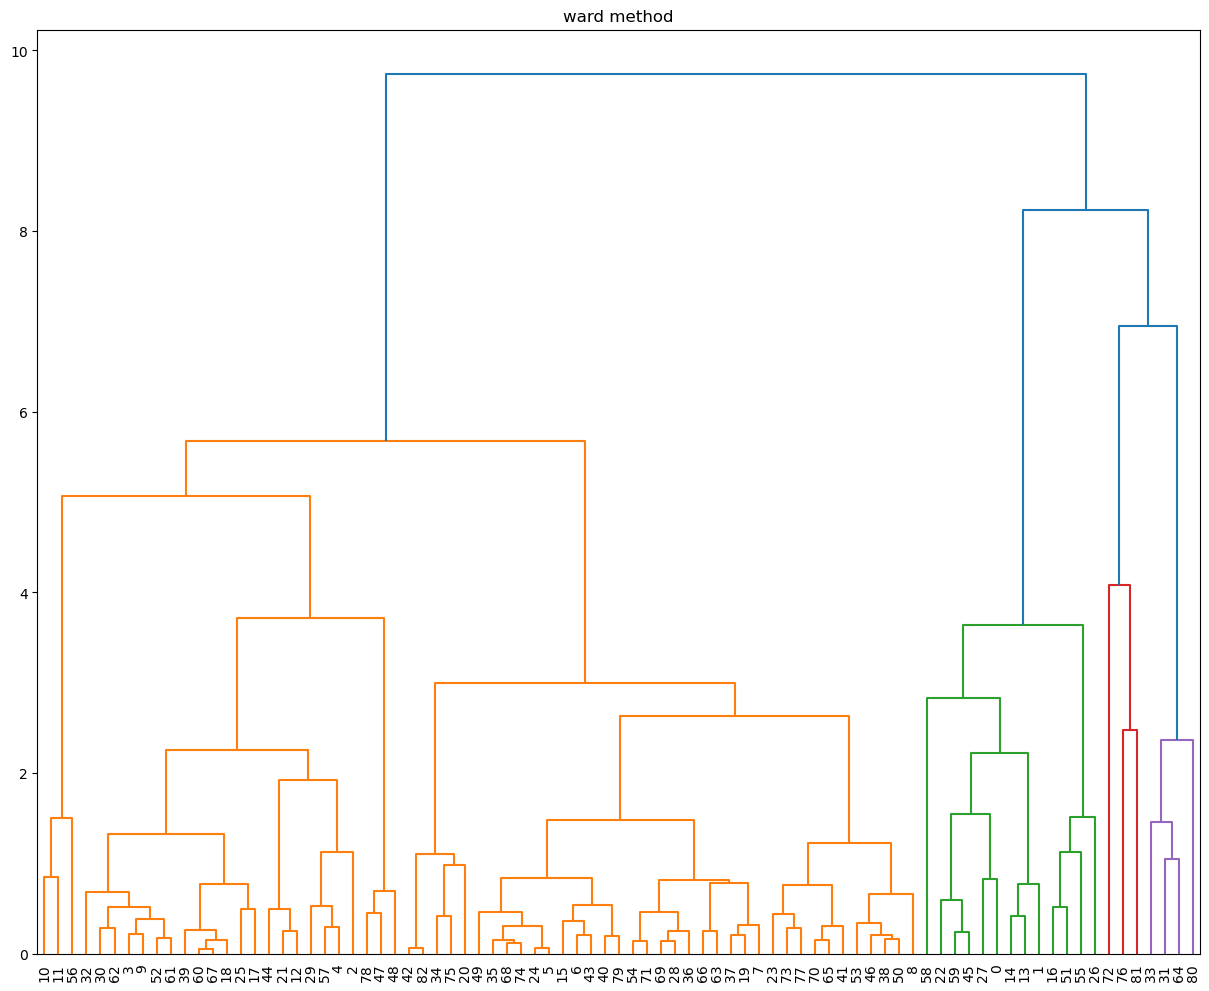

In [51]:
Z = hierarchy.linkage(factor_scores, method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

In [58]:
n_clusters = 6
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(factor_scores)

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(factor_scores)

F['ward_new'] = ward.labels_ + 1 
F['kmeans_new'] = kmeans.labels_ + 1
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old,ward_new,kmeans_new
0,-0.824533,-0.322679,-1.068478,3,6,3,2
1,-0.075663,0.374054,-1.532406,3,6,3,2
2,0.848591,-0.171713,-0.000413,4,1,2,6
3,-0.240657,0.334116,0.301290,4,1,2,6
4,0.140115,-0.024145,0.636523,2,1,2,5
...,...,...,...,...,...,...,...
78,-0.097174,-1.426230,1.847488,5,2,2,5
79,-0.616563,0.116477,0.211045,4,1,5,6
80,2.464821,2.465007,-2.039933,6,5,4,1
81,4.922318,-0.096630,0.393453,6,3,1,3


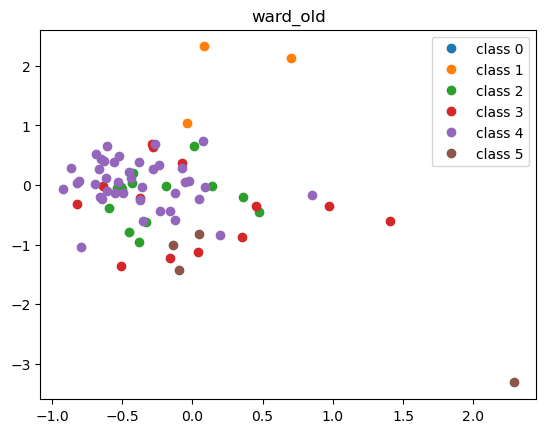

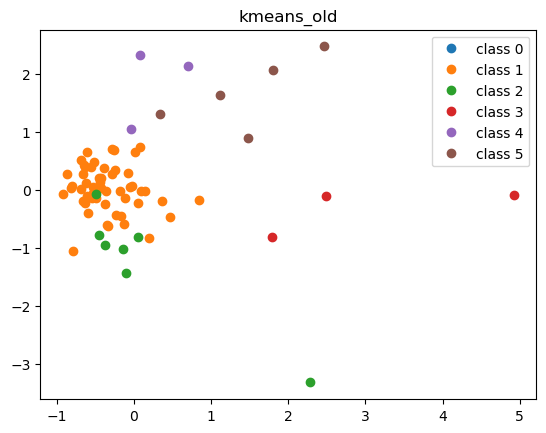

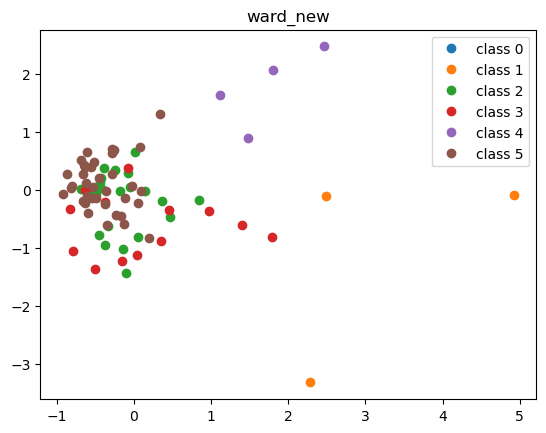

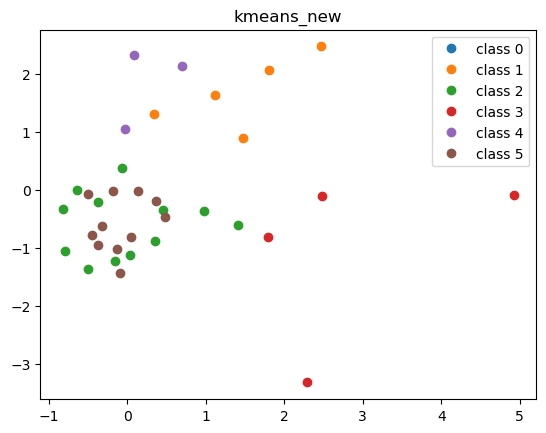

In [59]:
# Построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

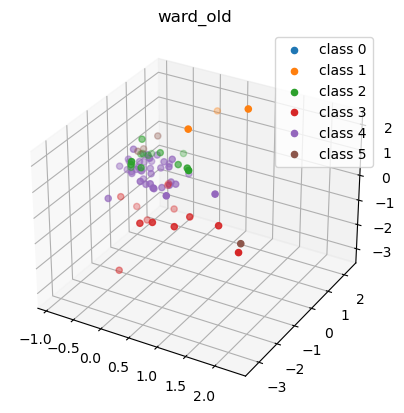

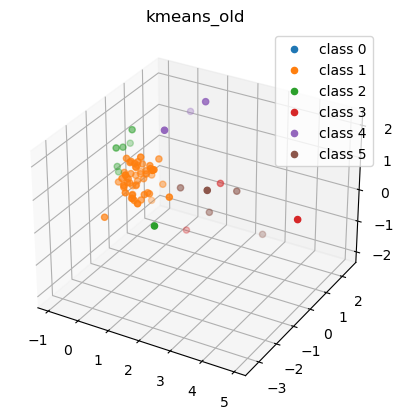

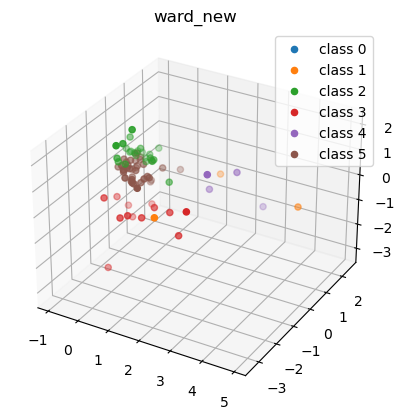

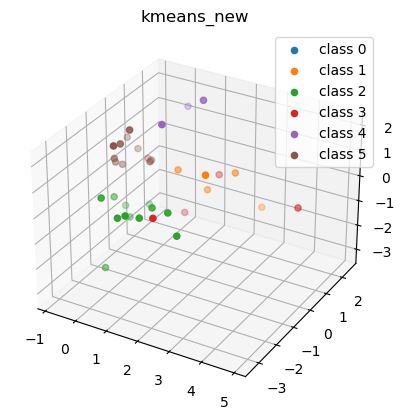

In [60]:
# Трехмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

In [61]:
df_result = pd.concat([F, df_factor_scores_lect], axis = 1)

df_result

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old,ward_new,kmeans_new,Factor1_lect,Factor2_lect,Factor3_lect
0,-0.824533,-0.322679,-1.068478,3,6,3,2,-0.980904,-0.415442,-1.363203
1,-0.075663,0.374054,-1.532406,3,6,3,2,-0.243321,0.484279,-1.875893
2,0.848591,-0.171713,-0.000413,4,1,2,6,0.931627,-0.357364,0.050029
3,-0.240657,0.334116,0.301290,4,1,2,6,-0.389559,0.536696,0.314452
4,0.140115,-0.024145,0.636523,2,1,2,5,0.266195,-0.089801,0.819470
...,...,...,...,...,...,...,...,...,...,...
78,-0.097174,-1.426230,1.847488,5,2,2,5,0.048465,-1.856742,2.145584
79,-0.616563,0.116477,0.211045,4,1,5,6,-0.743456,0.231065,0.224355
80,2.464821,2.465007,-2.039933,6,5,4,1,2.518287,3.274667,-2.281139
81,4.922318,-0.096630,0.393453,6,3,1,3,5.932557,-0.530973,0.741221


In [63]:
df_result.to_excel('Python4.xlsx')